# Filtrado Colaborativo basado en objetos

id_exp2  7961  7962  7963  7964  7965  7966  7967  7968  7969  7970  ...   \
id_exp1                                                              ...    
7961      1.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN  ...    
7962      NaN   1.0   NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN  ...    
7963      NaN   NaN   1.0   NaN   NaN  -1.0   NaN   NaN   NaN   NaN  ...    
7964      NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN  ...    
7965      NaN   0.0   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN  ...    

id_exp2  8077      8078  8079  8080  8081  8082  8083  8084  8085  8086  
id_exp1                                                                  
7961      NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
7962      NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
7963      NaN  0.741825   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
7964      NaN  0.000000   NaN  -1.0   NaN   NaN   NaN   NaN   NaN   NaN  
7965      NaN   

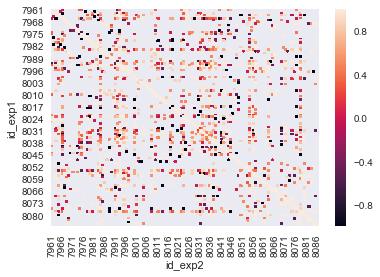

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from db.AdminMachineLearning import AdminMachineLearning
mldao = AdminMachineLearning()
corr = mldao.getMachineLearning().getCorrelations()
print (corr.head())
for x in corr:
    print (x)
p1 = sns.heatmap(corr)

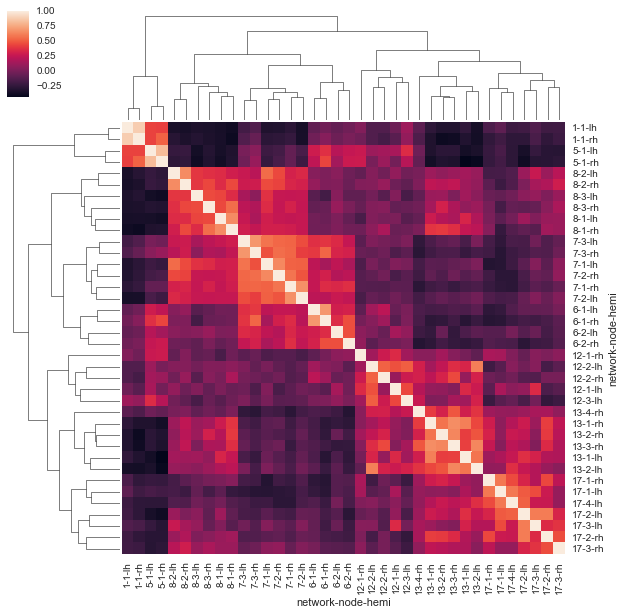

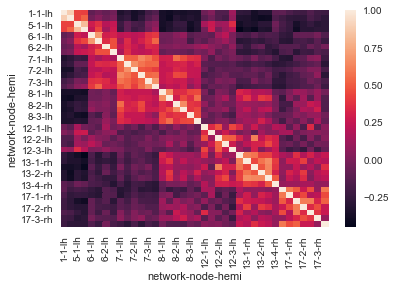

In [13]:
import pandas as pd
import seaborn as sns
sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr())
plt.show()
sns.heatmap(df.corr())

La función corr() nos calcula la correlación entre cada par de columnas en la matriz.

Queremos evitar resultados extraños de unas pocas personas que han calificado el mismo par de películas (una popular y una rara). Para restringir los resultados a películas populares usamos min_periods para eliminar los resultados de menos de 100 calificacaiones.

In [39]:
minRatings = 0
corrMatrix = userRatings.corr(method='pearson', min_periods=minRatings)
corrMatrix.head()

ZeroDivisionError: float division

Ahora vamos a producir recomendaciones para el usuario ID 0, añadido manualmente al dataset. Le gusta Star Wars y The Empire Strikes Back, pero odia Gone with the Wind

In [29]:
i = 0
j = 0
for user in test.groupby("user_id"):
    for anime in test[test["user_id"] == user[0]].values:
        corr = corrMatrix[corrMatrix.index == anime[2]]
        i += 1
        if (not corr.empty):
            print (user[0], anime[2])
            print (corr)
        if (i == 1000):
            j += i
            i = 0
            print (user[0], anime[2])
            print ("vacío", j)     


17 Danna ga Nani wo Itteiru ka Wakaranai Ken
vacío 1000
38 Sora no Otoshimono: Forte
vacío 2000
47 Code Geass: Hangyaku no Lelouch
vacío 3000
77 Ouran Koukou Host Club
vacío 4000
102 Suzumiya Haruhi no Yuuutsu
vacío 5000
123 Yondemasu yo, Azazel-san. (TV)
vacío 6000
134 Katekyo Hitman Reborn!
vacío 7000
159 Wolf&#039;s Rain
vacío 8000
171 Zankyou no Terror
vacío 9000
196 Neko no Ongaeshi
vacío 10000
219 Love Stage!!
vacío 11000
233 Black Bullet
vacío 12000
245 Big Order (TV)
vacío 13000
256 Steins;Gate Movie: Fuka Ryouiki no Déjà vu
vacío 14000
271 Tokyo ESP
vacío 15000
288 Dakara Boku wa, H ga Dekinai.
vacío 16000
294 Last Exile: Ginyoku no Fam Recaps
vacío 17000
308 Sky Girls
vacío 18000


KeyboardInterrupt: 

In [15]:
myRatings = userRatings.loc[1].dropna()
myRatings

name
High School DxD           10.0
High School DxD New       10.0
Highschool of the Dead    10.0
Sword Art Online          10.0
Name: 1, dtype: float64

Ahora vamos a recorrer cada película calificada por el usuario y a crear una lista de posibles recomendaciones basadas en películas similares a las calificadas.

Para cada película calificada vamos a recuperar la lista de películas similares de la matriz de correlación. Luego se escala el puntaje de correlación según la calificación dada por el usuario en la película que es similar, entonces las películas que le gustaron mas van a contar más que las que no.

In [29]:
simCandidates = pd.Series()
print(simCandidates)
for i in range(0, len(myRatings.index)):
    print ("Añadiendo pelis similares a " + myRatings.index[i] + "...")
    # Recuperar las pelis similares a las calificadas
    sims = corrMatrix[myRatings.index[i]].dropna()
    # Escalar la similaridad multiplicando por la calificación de la persona
    sims = sims.map(lambda x: x * myRatings[i])
    # Añadir el puntaje a la lista de candidatos similares
    simCandidates = simCandidates.append(sims)
    
#Mirar los resultados:
print ("ordenando...")
simCandidates.sort_values(inplace = True, ascending = False)
print (simCandidates.head(10))

Series([], dtype: float64)
Añadiendo pelis similares a High School DxD...
Añadiendo pelis similares a High School DxD New...
Añadiendo pelis similares a Highschool of the Dead...
Añadiendo pelis similares a Sword Art Online...
ordenando...
Highschool of the Dead                                      10.000000
High School DxD New                                         10.000000
High School DxD                                             10.000000
Sword Art Online                                            10.000000
High School DxD New                                          8.601275
High School DxD                                              8.601275
Sword Art Online: Extra Edition                              7.046339
Sword Art Online II                                          6.999119
Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka     5.396536
Highschool of the Dead                                       5.304956
dtype: float64


Algunas películas aparecen más de una vez porque son similares a más de una de las calificadas. Las agrupamos usando groupby() para sumar sus puntajes, así contarán más:

In [30]:
simCandidates = simCandidates.groupby(simCandidates.index).sum()

In [31]:
simCandidates.sort_values(inplace = True, ascending = False)
simCandidates.head(10)

High School DxD                                             28.670757
High School DxD New                                         28.036078
Highschool of the Dead                                      25.220037
Sword Art Online                                            24.298692
Sword Art Online: Extra Edition                             22.246093
Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka    20.295541
Sword Art Online II                                         19.997884
Fairy Tail                                                  19.577092
Code:Breaker                                                18.570910
Accel World                                                 18.361551
dtype: float64

La última cosa por hacer es quitar las películas ya calificadas:

In [32]:
filteredSims = simCandidates.drop(myRatings.index)
filteredSims.head(10)

Sword Art Online: Extra Edition                             22.246093
Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka    20.295541
Sword Art Online II                                         19.997884
Fairy Tail                                                  19.577092
Code:Breaker                                                18.570910
Accel World                                                 18.361551
Btooom!                                                     18.294510
Ao no Exorcist                                              18.085084
Girls Bravo: First Season                                   18.036263
Devil Survivor 2 The Animation                              17.982472
dtype: float64

¡Listo!

## Ejercicios

- ¿Puedes mejorar los resultados? Quizás un método diferente o una valor de min_periods en la correlación de mejores resultados.

- Parece que algunas películas similares a Gone with the Wind (con mala calificación) se han colado en la lista final de recomendaciones. ¿Quizás esas películas deberían ser penalizadas en vez de solamente escaladas hacia abajo?

- Probablemente hay "outliers" en el dataset de usuarios, usuarios que han calificado muchísimas películas y que provocan un efecto desproporcionado en los resultados. Trata de quitar esos usuarios y mira si mejora los resultados.

- Hasta ahora hemos evaluado los resultados de manera cualitativa, pero podríamos usar train/test y medir nuestra habilidad para predecir la calificación de un usuario de una película que ya ha visto. Si esto es una medida de lo que es una buena recomendación, es para otro debate...